In [57]:
from sklearn import datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


data=datasets.load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=["MEDV"])
df1=pd.concat([df['RM'], target['MEDV']], axis=1, keys=['RM', 'MEDV'])


In [58]:
msk = np.random.rand(len(df1)) < 0.8

train, test= df1[msk], df1[~msk]

train, test

(        RM  MEDV
 0    6.575  24.0
 1    6.421  21.6
 3    6.998  33.4
 6    6.012  22.9
 8    5.631  16.5
 ..     ...   ...
 498  6.019  21.2
 499  5.569  17.5
 501  6.593  22.4
 502  6.120  20.6
 505  6.030  11.9
 
 [381 rows x 2 columns],
         RM  MEDV
 2    7.185  34.7
 4    7.147  36.2
 5    6.430  28.7
 7    6.172  27.1
 12   5.889  21.7
 ..     ...   ...
 487  5.905  20.6
 495  5.670  23.1
 500  6.027  16.8
 503  6.976  23.9
 504  6.794  22.0
 
 [125 rows x 2 columns])

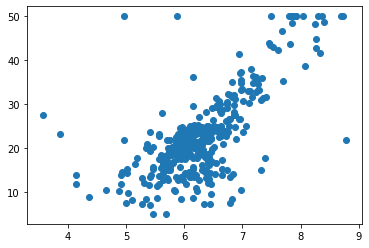

In [59]:
X = train.iloc[:, 0]
Y = train.iloc[:, 1]
plt.scatter(X, Y)

In [60]:
# Building the model
m=c=0
L=0.0001 #the learning rate
epochs = 1000  # The number of iterations to perform gradient descent
n=len(train) #number of elements in training dataset

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c


m, c


(3.578863009320132, 0.4705373390512248)

Text(0.5, 0, 'number of rooms')

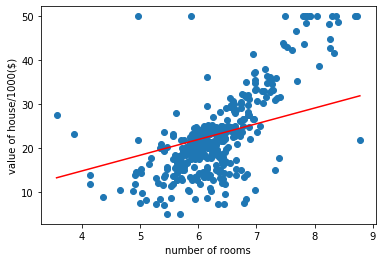

In [62]:
# Making predictions
X = train.iloc[:, 0]
Y = train.iloc[:, 1]
Y_pred = m*X + c

plt.scatter(X, Y) 
prediction_space= ([min(X), max(X)])
plt.plot(prediction_space, [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


X = np.array(df['RM']).reshape(-1,1)
Y = np.array(target['MEDV']).reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [64]:

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(metrics.mean_squared_error(Y_train, y_train_predict)))
r2 = metrics.r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(metrics.mean_squared_error(Y_test, y_test_predict)))
r2 = metrics.r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 6.972277149440585
R2 score is 0.4340897790637215


The model performance for testing set
--------------------------------------
RMSE is 4.895963186952216
R2 score is 0.6938399401553497


Text(0.5, 0, 'number of rooms')

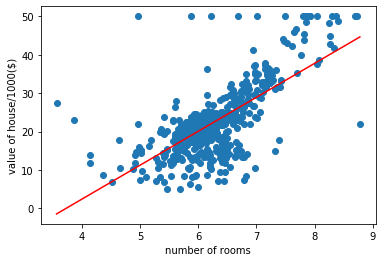

In [66]:
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1) 
plt.scatter(X,Y)
plt.plot(prediction_space, lin_model.predict(prediction_space), color = 'red')
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
